# About The Data
Our goal for this lab is to construct a model that can take a certain set of features related to the Titanic and predict whether a person survived or not (0 or 1). Since we're trying to predict a binary categorical variable (1 or 0), logistic regression seems like a good place to start from.

The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:

PassengerId
Survived (0 or 1)
Pclass: Ticket class (1, 2, or 3 where 3 is the lowest class)
Name
Sex
Age: Age in years
SibSp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Note: This lab will be the same as lab 5 (logistic regression). The only difference is that here we will be using a neural network instad. You're welcome to skip to the creating our neural network section if you're already familiar with this dataset.

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# Load the data into a pandas DataFrame
# Calling .head() to return first 5 data
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# My practical code
# calling .tail() to return last 5 data
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# calling .describe()
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# calling .info() to see any missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# My practical code
# calling .isnull().sum() to see how many missing values from each variables
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

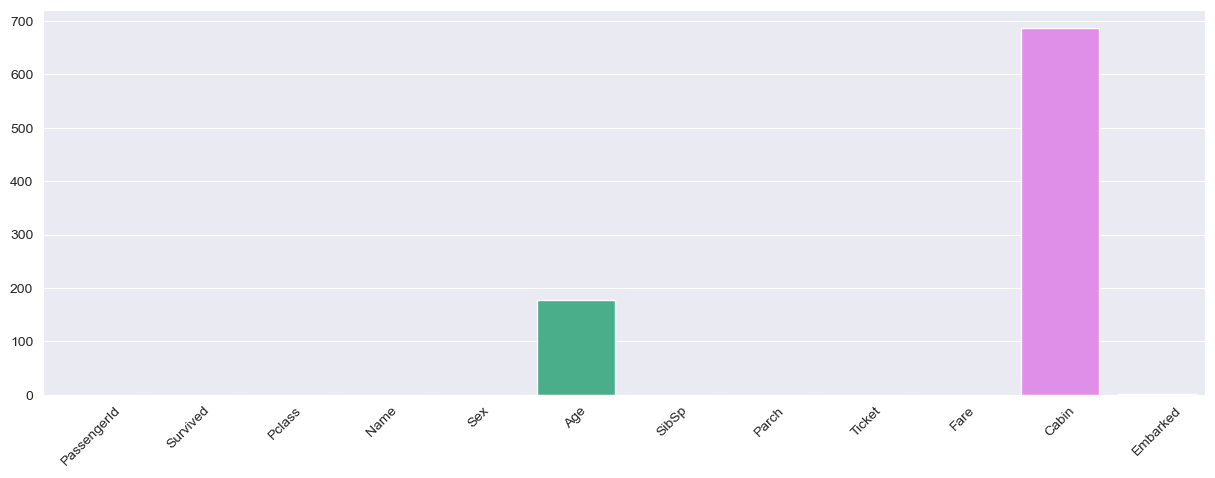

In [8]:
# Create a barplot to visualize the missing values
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

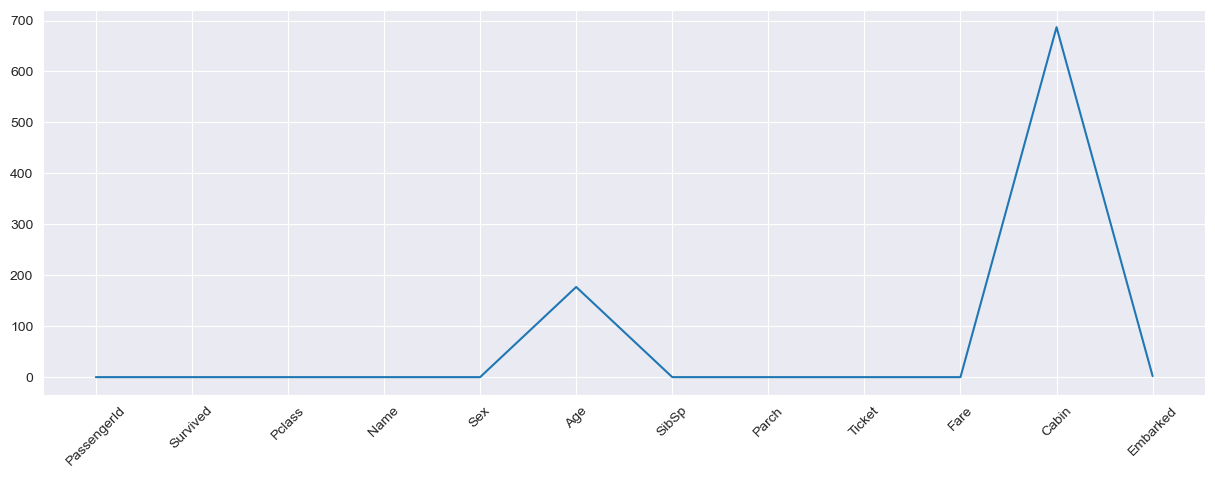

In [9]:
# My practical code
# Lets see it in a different plot
# Using lineplot
sns.lineplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [10]:
# See true and false values where there is a missing value
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# My practical code
# We can also do .notnull() to see values that is not missing by true or false
titanic_data.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [12]:
# sum of missing value for each variable
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# My practical code
# instead of Calling .sum() 
# Lets try .any() to see if null values are found then return true otherwise false. 
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
# missing value counts by .values
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

In [15]:
# My practical code
# Lets try calling .index
titanic_data.isnull().sum().index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

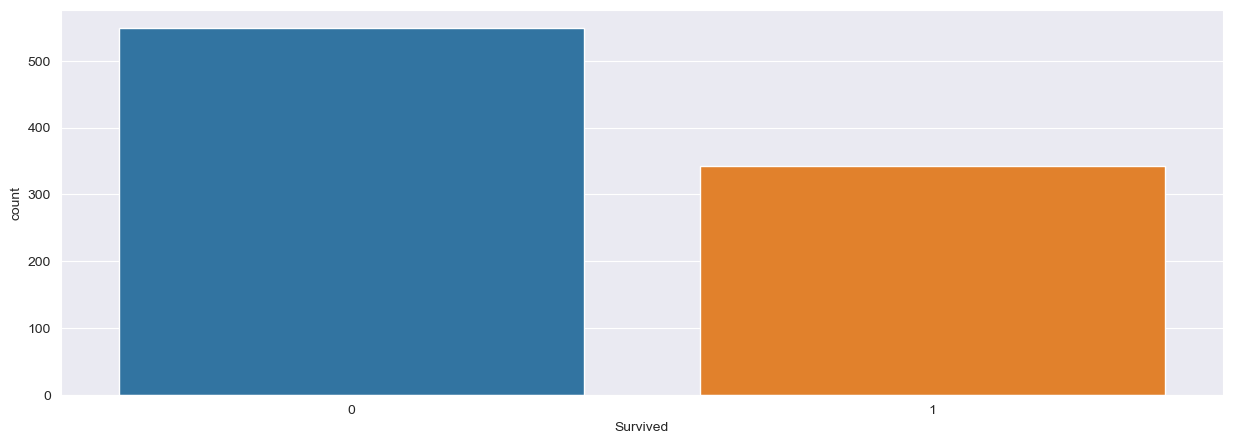

In [16]:
# Create a countplot of 'Survived'
sns.countplot(x=titanic_data['Survived'])
plt.show()

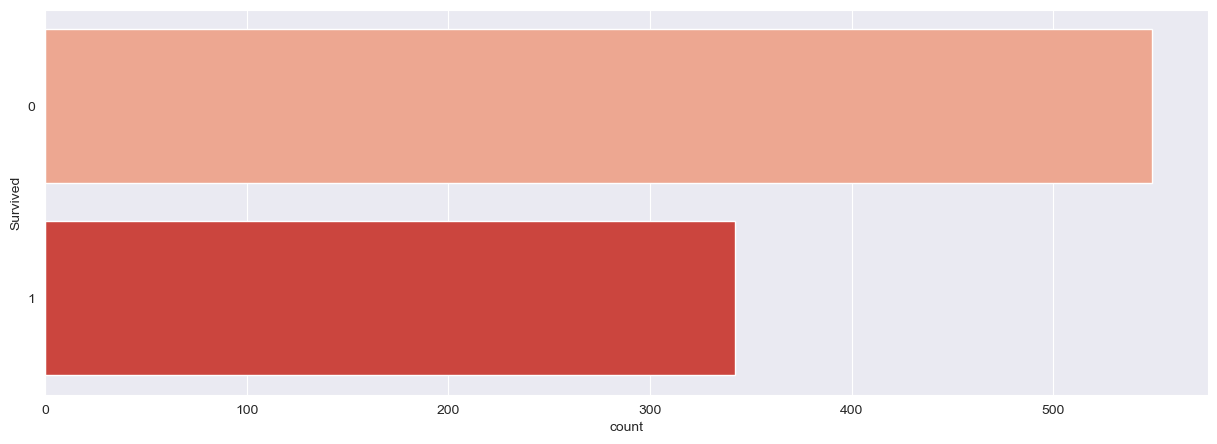

In [17]:
# My practical code
# Lets try plot horizontally and palette = "flare"
sns.countplot(y = titanic_data['Survived'], palette = 'Reds')
plt.show()

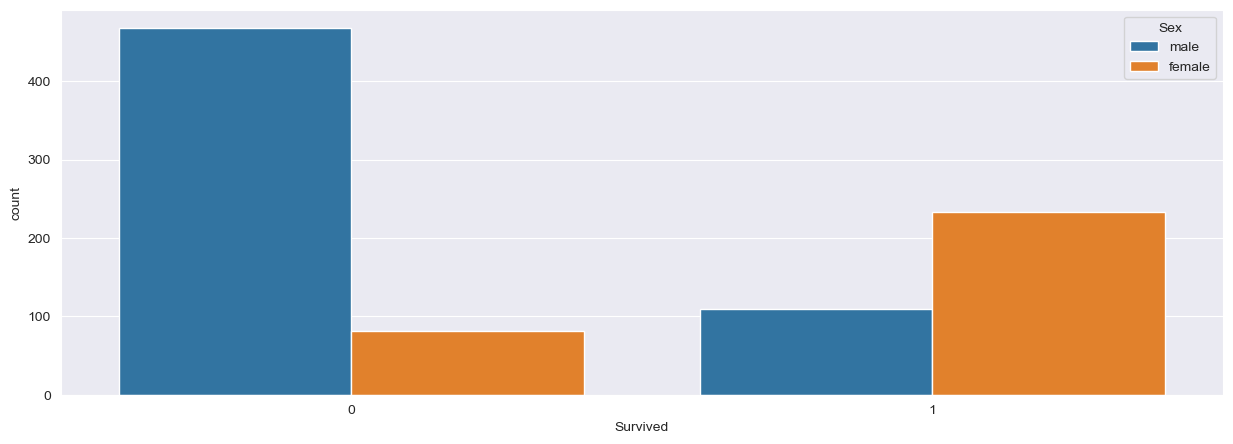

In [18]:
# add hue = 'Sex'
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data)
plt.show()

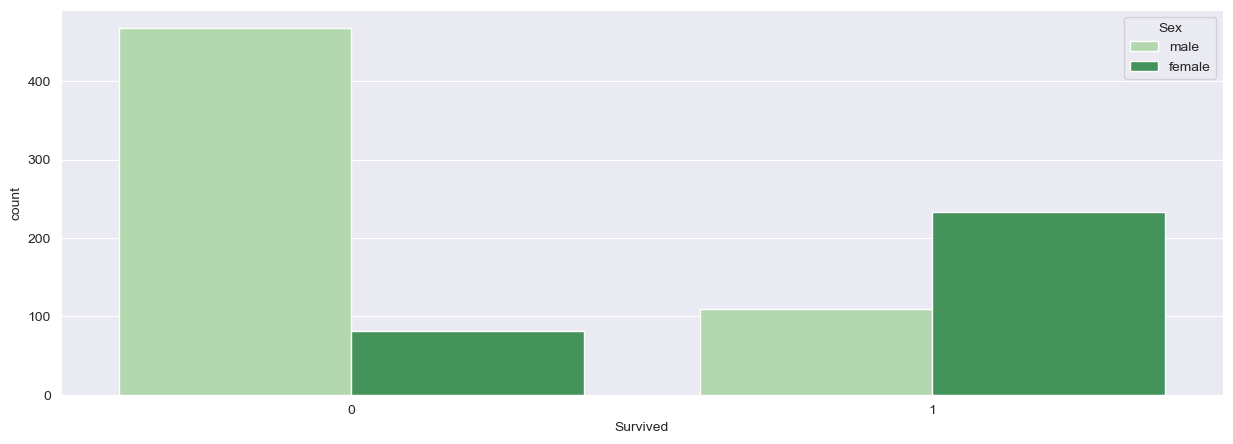

In [19]:
# My practical code
# Change colors by palette = "Greens"
sns.countplot(x = titanic_data['Survived'], hue = 'Sex', data = titanic_data, palette = "Greens")
plt.show()

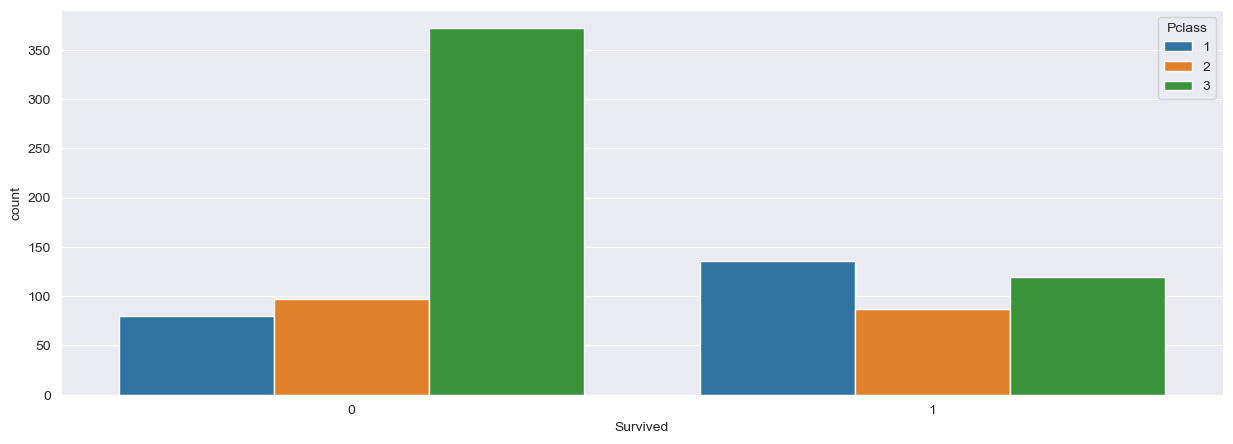

In [20]:
# hue = 'Pclass'
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data)
plt.show()

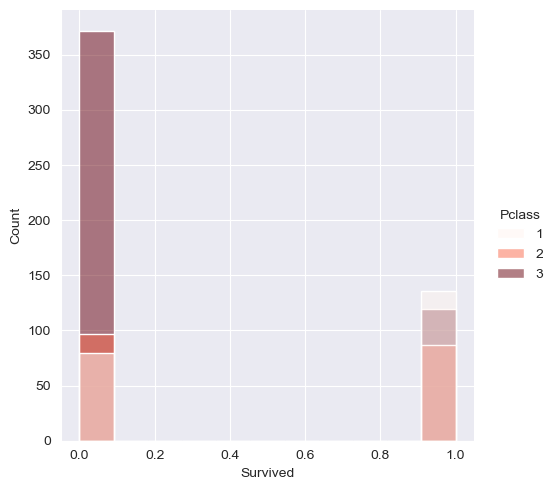

In [21]:
# My practical code
# Lets see in a displot and add red colors
sns.displot(x = titanic_data['Survived'], hue = 'Pclass', data = titanic_data, palette = "Reds")
plt.show()

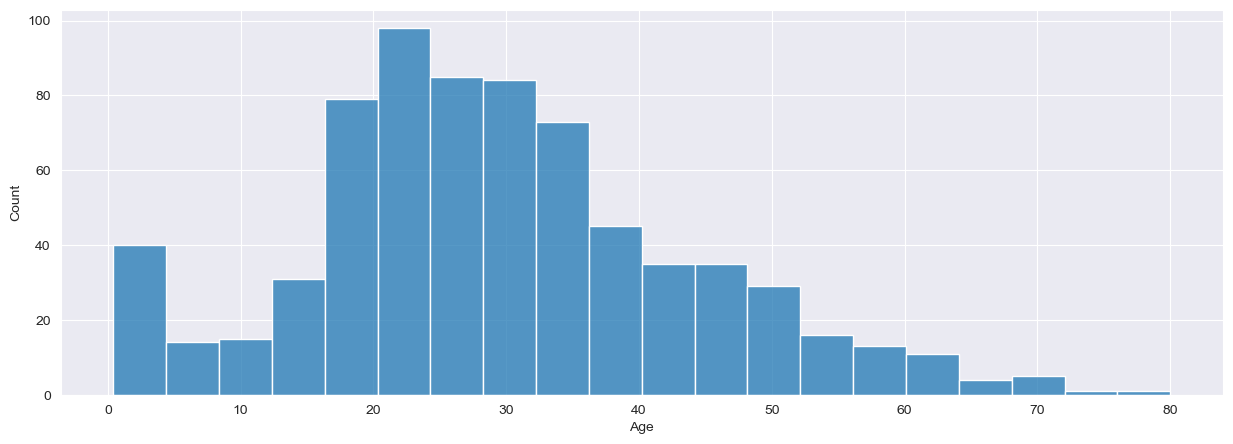

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
# Create histplot of 'Age'
# call .describe()
sns.histplot(x=titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

In [23]:
# My practical code
# Lets see what .dropna() does
titanic_data['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

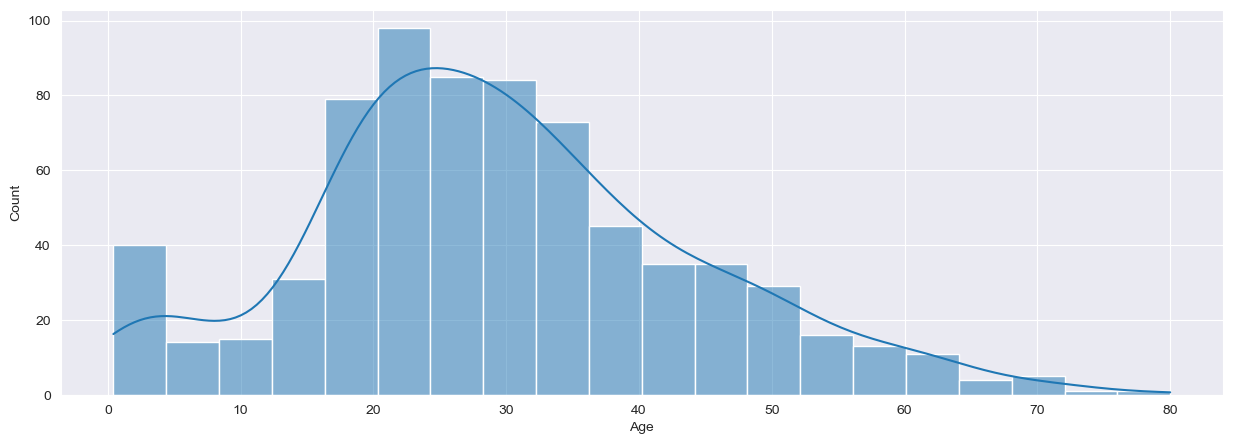

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# My practical code
# Lets add a kernal density estimate to that histplot
sns.histplot(x = titanic_data['Age'].dropna(), kde = True)
plt.show()
titanic_data['Age'].describe()

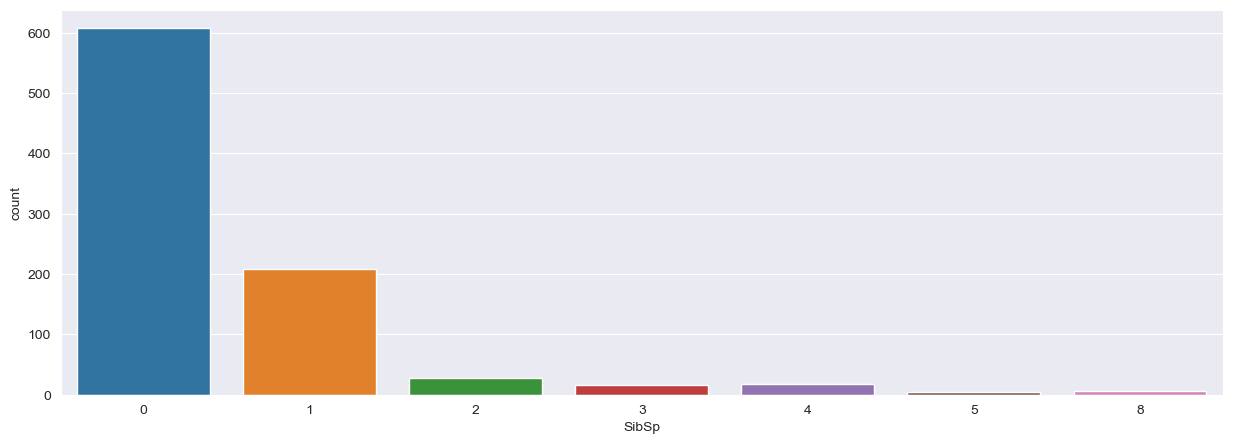

In [25]:
# Create a countplot of 'SibSp'
sns.countplot(x=titanic_data['SibSp'])
plt.show()

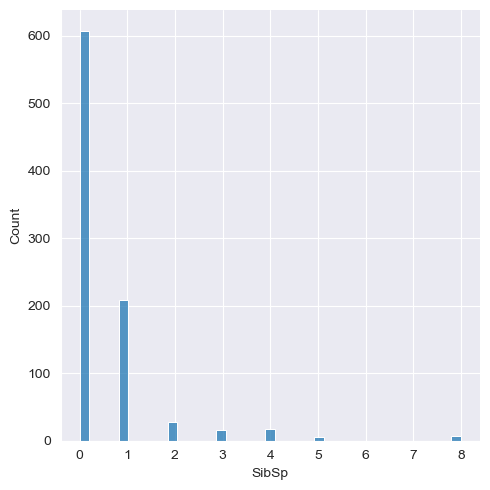

In [26]:
# My practical code
# See displot of 'SibSp'
sns.displot(x = titanic_data['SibSp'])
plt.show()

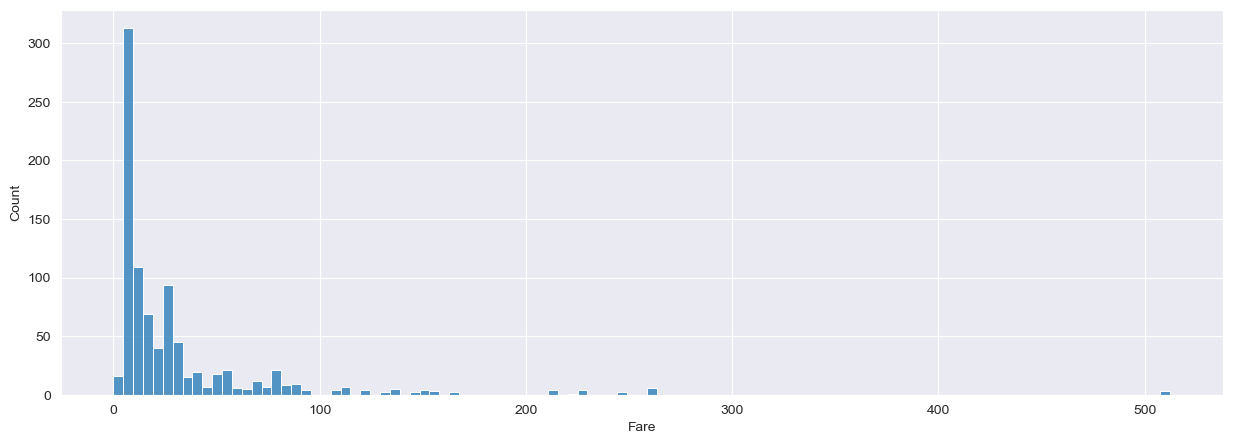

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
# Create a histplot of 'Fare'
# call .describe()
sns.histplot(x=titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()

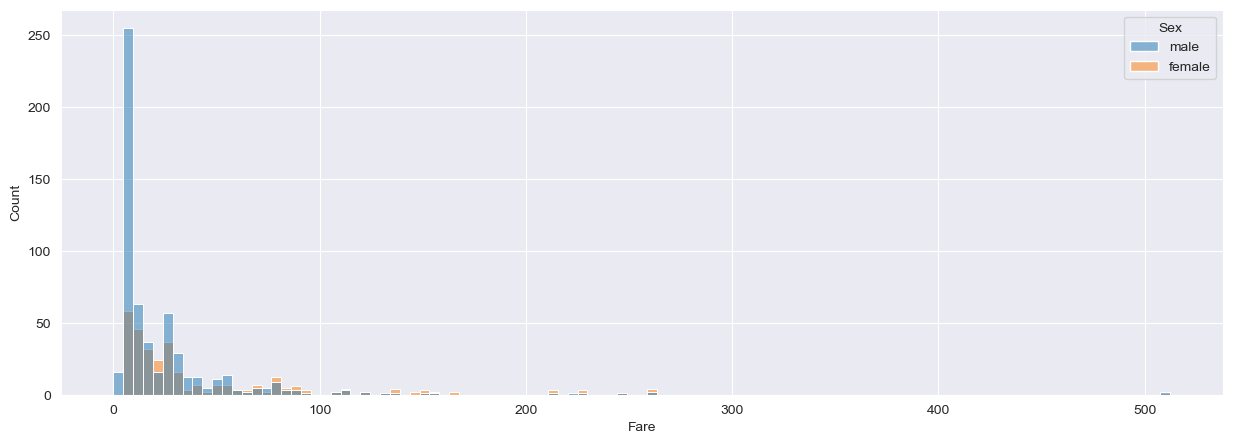

In [28]:
# My practical code
# add hue = 'Sex'
sns.histplot(x = titanic_data['Fare'], hue = 'Sex', data = titanic_data)
plt.show()

# Data Preprocessing
Let's first take care of our missing values. Recall how much data was missing:

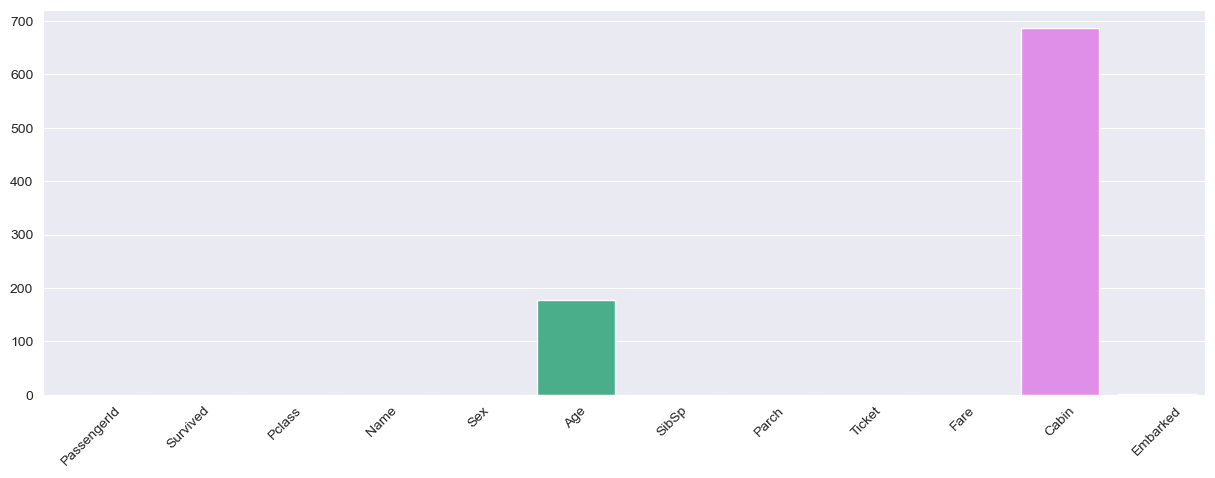

In [29]:
# Recall a barplot of missing values
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [30]:
# missing value with mean age
# calling .apply(func) with lambda
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

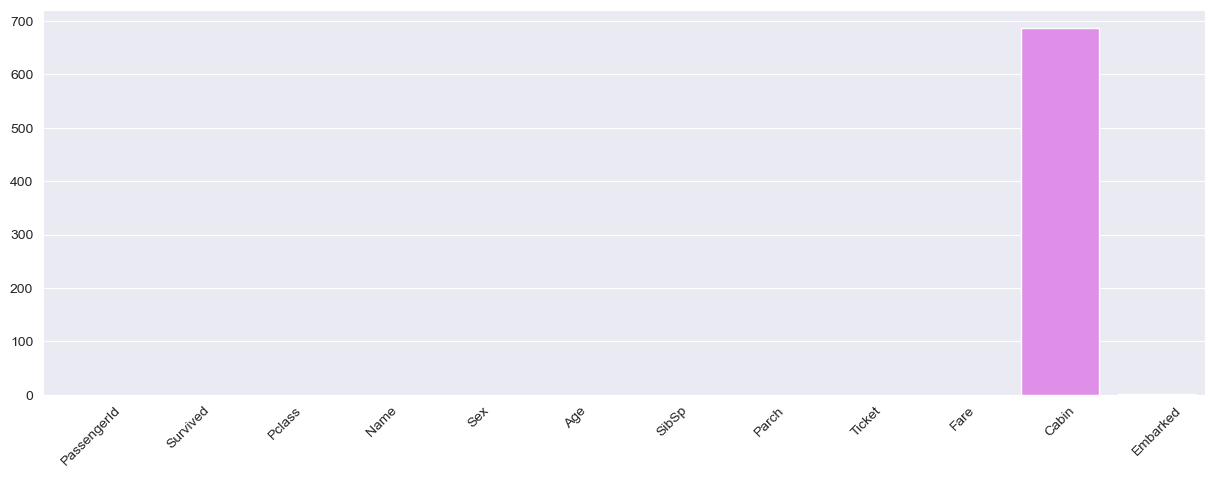

In [31]:
# Recreate the barplot to see the missing value for age
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [32]:
# My practical code 
# Now call isnull.sum() to see the 'Age' missing value is gone
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Drop 'Cabin' column
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)

In [34]:
# My practical code 
# Now call isnull.sum() to see the 'Cabin' missing value is gone
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
# Recalling .info() to see any more missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [36]:
# Creating a dummiy variable
# Drop Name and Ticket column
titanic_data = pd.get_dummies(data = titanic_data, columns = ['Sex', 'Embarked'], drop_first = True)
titanic_data.drop(labels = ['Name', 'Ticket'], axis = 1, inplace = True)

In [37]:
# call .head()
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
# My practical code
# show more data from .head()
titanic_data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,29.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


# Creating our Neural Network Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [39]:
# Importing train_test_split
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q',
                        'Embarked_S']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [40]:
# My practical code
# Using test size = 0.2

X2 = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q',
                        'Embarked_S']]
y2 = titanic_data['Survived']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [41]:
# Importing MLPClassifier
# fit the model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 500, activation = 'relu')
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [42]:
# My practical code
# Using test size = 0.2
# fit the model

mlp20 = MLPClassifier(max_iter = 500, activation = 'relu')
mlp20.fit(X2_train, y2_train)

MLPClassifier(max_iter=500)

# Model Evaluation
Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels.

In [43]:
# Predictions on x_test
predictions = mlp.predict(X_test)

In [44]:
# My practical code
# Using test size = 0.2
# Predictions on x_test
pred = mlp20.predict(X2_test)

In [45]:
# Importing classification_report and confusion_matrix
# Print both confusion_matrix and classification_report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[152  20]
 [ 57  38]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       172
           1       0.66      0.40      0.50        95

    accuracy                           0.71       267
   macro avg       0.69      0.64      0.65       267
weighted avg       0.70      0.71      0.69       267



In [46]:
# My practical code 
# Using test size = 0.2
# Print both confusion_matrix and classification_report

print(confusion_matrix(y2_test, pred))
print(classification_report(y2_test, pred))

[[73 32]
 [19 54]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       105
           1       0.63      0.74      0.68        73

    accuracy                           0.71       178
   macro avg       0.71      0.72      0.71       178
weighted avg       0.73      0.71      0.72       178



In [47]:
# Adjusting the default parameters
mlp2 = MLPClassifier(max_iter=3000, activation='logistic', hidden_layer_sizes=(1000,900))
mlp2.fit(X_train,y_train)

predictions2 = mlp2.predict(X_test)

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[138  34]
 [ 14  81]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       172
           1       0.70      0.85      0.77        95

    accuracy                           0.82       267
   macro avg       0.81      0.83      0.81       267
weighted avg       0.84      0.82      0.82       267



In [48]:
# My practical code
# Using test size = 0.2
# Use hidden_layer_sizes as (900, 800)
mlp20_new = MLPClassifier(max_iter=3000, activation='logistic', hidden_layer_sizes=(900,800))
mlp20_new.fit(X2_train,y2_train)

pred2 = mlp20_new.predict(X2_test)

print(confusion_matrix(y2_test,pred2))
print(classification_report(y2_test,pred2))

[[102   3]
 [ 45  28]]
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       105
           1       0.90      0.38      0.54        73

    accuracy                           0.73       178
   macro avg       0.80      0.68      0.67       178
weighted avg       0.78      0.73      0.70       178



Using another data set to improve the accuracy of the linear model by using the neural network model

In [49]:
# Load the data into pandas DataFrame
# call .head()
ads = pd.read_csv('advertising.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [50]:
# Check to see any missing values
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [51]:
# Split the data into training and testing
# Using test size = 0.3
X1 = ads[['TV', 'Radio', 'Newspaper']]
y1 = ads['Sales']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

In [52]:
# Using Linear Regression model
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fit the model
lm.fit(X1_train, y1_train)

LinearRegression()

In [53]:
# Predictions
pred1 = lm.predict(X1_test)

In [54]:
# Importing r2_score 
from sklearn.metrics import r2_score

# Get the r2 score of the linear model
r2_score(lm.predict(X1_test), y1_test)

0.8441228840845505

In [55]:
# Using Neural Network model
# Importing MLPRgressor
from sklearn.neural_network import MLPRegressor

# Fit the model
mlp1 = MLPRegressor(max_iter=1000, activation='relu', hidden_layer_sizes=(1000,900))
mlp1.fit(X1_train, y1_train)

# Predictions
pred1 = mlp1.predict(X1_test)

# Get the r2 score of the neural network model
r2_score(y1_test, pred1)

0.8968614198843372